# [NML23] Assignment 1B: Network Models

TAs: [Ortal Senouf](https://people.epfl.ch/ortal.senouf) and [William Cappelletti](https://people.epfl.ch/william.cappelletti)

## Students

* Team: `<your team number>`
* Students: `<your name`> (for the indivudual submission) or `<the name of all students in the team>` (for the team submission)

## Rules

> ⚠️ **Read carefully before starting**

**Deadline:** March 28th

**Grading:**
* The integrality of Assignment 1 will be scaled to 100% and will amount to 25% of the overall assignments score.
* The total number of points for part B is **52**, the points for each exercise are stated in the instructions.
* All team members will receive the same grade based on the team solution.
* Collaboration between team members is encouraged. No collaboration between teams is allowed.

**Expected output:**

You will have coding and theoretical questions. Coding exercises shall be solved within the specified space:
```python
# Your solution here ###########################################################
...
#^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
```
Anything outside shall not be touched, except if otherwise stated.

Theoretical questions shall be answered in the following markdown cell. The first line will be 
> **Your answer here:**

**Submission:**
* Your submission is self-contained in the `.ipynb` file.

* Code has to be clean and readable. Provide meaningful variable names and comment where needed.

* Textual answers in [markdown cells][md_cells] shall be short: one to two
  sentences. Math shall be written in [LaTeX][md_latex].
    **NOTE**: handwritten notes pasted in the notebook are ignored

* You cannot import any other library than we imported.
  Note that Networkx is imported in the second section and cannot be used in the first except for the Question 4 of Section 1 (at the indicated portion only).

* Make sure all cells are executed before submitting. I.e., if you open the notebook again it should show numerical results and plots. Cells not run are ignored.

* Execute your notebook from a blank state before submission, to make sure it is reproducible. You can click "Kernel" then "Restart Kernel and Run All Cells" in Jupyter. We might re-run cells to ensure that the code is working and corresponds to the results.

[md_cells]: https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html
[md_latex]: https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html#LaTeX-equations

## Objective

The purpose of this assignment is to explore a given dataset, represent it by network by constructing different graphs. In the first section, you analyzed various network properties. In this second section, you will explore various network models and find out the network model fitting the ones you construct from the dataset.

In [1]:
#!pip install networkx==3.0 -q
#!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1Ze-vDx_cMr7iNkivv8LLhniEtp4RD1ug' -O data_1b.pickle

In [1]:
import pickle

import matplotlib.pyplot as plt
import numpy as np

with open("data_1b.pickle", "rb") as f:
    data_1b = pickle.load(f)
f.close()
A_citation = data_1b['cit_graph']
A_feature_pruned = data_1b['feat_graph']

## Section B: Network Models

In this section, you will analyze the feature and citation graphs you constructed in the previous section in terms of the network model types.
For this purpose, you can use the NetworkX libary imported below. **Notice** that the citation and features adjency matrices were given to you in the previous code block.  

In [2]:
import networkx as nx

The next cell creates NetworkX graph objects from the adjacency matrices computed in the previous section. 

In [3]:
G_citation = nx.from_numpy_array(A_citation)
print('Number of nodes: {}, Number of edges: {}'. format(G_citation.number_of_nodes(), G_citation.number_of_edges()))
print('Number of self-loops: {}, Number of connected components: {}'. format(nx.number_of_selfloops(G_citation), nx.number_connected_components(G_citation)))

Number of nodes: 418, Number of edges: 827
Number of self-loops: 0, Number of connected components: 16


In the rest of this assignment, we will consider the pruned feature graph as the feature network.

In [4]:
G_feature = nx.from_numpy_array(A_feature_pruned)
print('Number of nodes: {}, Number of edges: {}'. format(G_feature.number_of_nodes(), G_feature.number_of_edges()))
print('Number of self-loops: {}, Number of connected components: {}'. format(nx.number_of_selfloops(G_feature), nx.number_connected_components(G_feature)))

Number of nodes: 418, Number of edges: 2364
Number of self-loops: 0, Number of connected components: 324


### Question 5 [8pt]: Simulation with the Erdős–Rényi (ER) random model

Create an ER graph using NetworkX to simulate the citation graph and the feature graph you have. When choosing parameters for the networks, take into account the number of vertices and edges of the original networks.

The number of nodes should exactly match the number of nodes in the original citation and feature graphs.

In [5]:
assert len(G_citation.nodes()) == len(G_feature.nodes())
n = len(G_citation.nodes())
n

418

We pick the number of links as the average of the number of edges in the citation and the feature graph.

In [6]:
m = np.round((G_citation.size() + G_feature.size()) / 2)
m

1596.0

**5.1 [2pt]** Explain how to determine the probability parameter for the Erdős–Rényi graph and crate a sample graph with NetworkX

**Your answer here:** 

In [7]:
# Your solution here ###########################################################
p = 2*m/(n*(n-1))
#^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
G_er = nx.erdos_renyi_graph(n, p)

Check the number of edges in the Erdős–Rényi graph.

In [8]:
print('My Erdos-Rényi network that simulates the citation graph has {} edges.'.format(G_er.size()))

My Erdos-Rényi network that simulates the citation graph has 1544 edges.


**5.2 [2pt]** Check the size of the largest connected component in the citation, feature, and Erdős–Rényi graphs.

In [9]:
# Your solution here ###########################################################
giant_citation = nx.subgraph(G_citation, sorted(nx.connected_components(G_citation), key=len, reverse=True)[0])

giant_feature = nx.subgraph(G_feature, sorted(nx.connected_components(G_feature), key=len, reverse=True)[0])

giant_er = nx.subgraph(G_er, sorted(nx.connected_components(G_er), key=len, reverse=True)[0])

#^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

print('The giant component of the citation graph has {} nodes and {} edges.'.format(giant_citation.number_of_nodes(), giant_citation.size()))
print('The giant component of the Erdos-Rényi network has {} nodes and {} edges.'.format(giant_er.number_of_nodes(), giant_er.size()))
print('The giant component of the feature graph has {} nodes and {} edges.'.format(giant_feature.number_of_nodes(), giant_feature.size()))

The giant component of the citation graph has 395 nodes and 818 edges.
The giant component of the Erdos-Rényi network has 417 nodes and 1544 edges.
The giant component of the feature graph has 82 nodes and 2351 edges.


**5.3 [2pt]** Simulate a new Erdős–Rényi network to match the number of nodes in the giant component of the feature graph.
Explain how to choose the probability parameter in this setting.

*Hint:* Recall the expected giant component size from the lectures.

**Your answer here:**  

In [10]:
# Your solution here ###########################################################

p_new = 1.1/(n-1)
#^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

G_er_new = nx.erdos_renyi_graph(n, p_new)

In [11]:
G_er_new.number_of_edges()

224

Check the size of the new Erdős–Rényi network and its giant component.

In [12]:
print('My new Erdos Renyi network that simulates the feature graph has {} edges.'.format(G_er_new.size()))
giant_er_new = G_er_new.subgraph(max(nx.connected_components(G_er_new), key=len)) # Your code here.
print('The giant component of the new Erdos-Rényi network has {} nodes and {} edges.'.format(giant_er_new.number_of_nodes(), giant_er_new.size()))

My new Erdos Renyi network that simulates the feature graph has 224 edges.
The giant component of the new Erdos-Rényi network has 58 nodes and 59 edges.


**5.4 [2 pt]** Is the new ER graph a good fit for the feature graph? Explain in terms of the size and density of the GC and overall graph. Remember that the feature graph in this section is a pruned version of the original dense graph.
 

**Your answer here:** 

### Question 6 [8pt]: Degree Distributions and configuration models

**6.1 [1pt]** Extract with NetworkX the degree distribution of the citation and the feature graph.

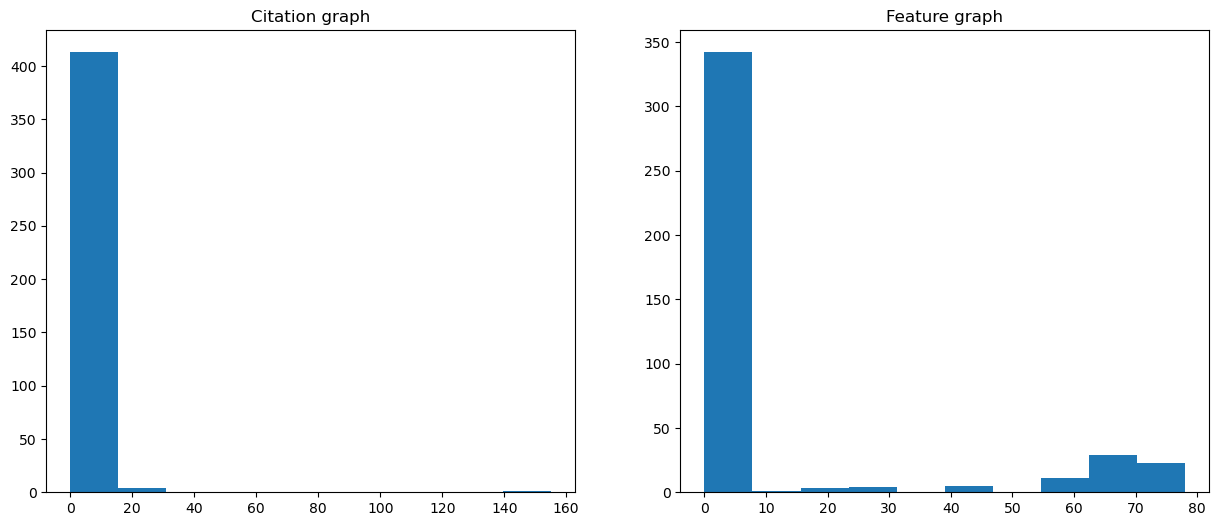

In [19]:
# Your solution here ###########################################################
citation_degrees = [x[1] for x in G_citation.degree]
feature_degrees = [x[1] for x in G_feature.degree]
#^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

fig, axes = plt.subplots(1, 2, figsize=(15, 6))
axes[0].set_title('Citation graph')
axes[0].hist(citation_degrees);
axes[1].set_title('Feature graph')
axes[1].hist(feature_degrees);

**6.2 [2pt]** Explain what the degree distribution tell us about a network. Then, discuss how to make a prediction on the network model type of the citation and the feature graph by looking at their degree distributions.

**Your answer here:** 

**6.3 [1pt]** Simulate a network using the configuration model to match the degree distribution of the feature exactly. Refer to [Configuration model](https://networkx.github.io/documentation/stable/reference/generated/networkx.generators.degree_seq.configuration_model.html#networkx.generators.degree_seq.configuration_model).


In [20]:
# Your solution here ###########################################################
G_config = nx.configuration_model(feature_degrees)
#^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
print('Configuration model has {} nodes and {} edges.'.format(G_config.number_of_nodes(), G_config.size()))
print('Feature model has {} nodes and {} edges.'.format(G_feature.number_of_nodes(), G_feature.size()))

Configuration model has 418 nodes and 2364 edges.
Feature model has 418 nodes and 2364 edges.


**6.4 [2pt]** Explain if the graph generated by the configuration model is identical to the feature graph. If not, motivate how to understand if they are not the same.

In both case, verify your answer with a code.

**Your answer here:** 


In [336]:
# Your solution here ###########################################################
np.allclose(nx.to_numpy_array(G_feature) , nx.to_numpy_array(G_config))
nx.global_efficiency(G_feature)
#^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

0.03262461800894207

In [337]:
nx.global_efficiency(G_config)

0.03948898297629745

**6.5 [2pt]** Which alternative model would you choose to match the degree distribution of the original network while mainitaining some structural similarities? 

**Your answer here:**  
some rewiring probability on original graph

### Question 7 [11pt]: Clustering Coefficient and Watts-Strogatz model

Let us check the average clustering coefficient of the original citation and feature graphs. 

In [33]:
CC_cit = nx.average_clustering(G_citation)
CC_feat = nx.average_clustering(G_feature)
print("Clustering coefficient of citation graph:", CC_cit)
print("Clustering coefficient of feature graph:", CC_feat)

Clustering coefficient of citation graph: 0.31318396750074196
Clustering coefficient of feature graph: 0.17909022944594014


Let's compare it with the ER random netwrok model:

In [34]:
print("Clustering coefficient of ER graph", nx.average_clustering(G_er))

Clustering coefficient of ER graph 0.015775658419199076


**7.1 [2pt]** Explain what the clustering coefficient tell us about a network. Comment on how it compares to the random model.

**Your answer here:** 

**7.2 [2pt]** In order to model the relatively high cluster coefficient of the **citation** graph while still maintaining the "small world" feature you will now create a Watts-Strogatz (WS) graph to fit the citation graph. First, set the regularity parameter $k$ Explain your choice.

**Your answer here:**  
this will determine how many edges get created in the graph prior to rewiring, so it should be set to the avg degree of the Citation graph.

In [44]:
# Your solution here ###########################################################
k_cit = np.round(2*G_citation.number_of_edges()/n).astype(int)
#^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

**7.3 [3pt]** In order to select the optimal randomness parameter $p$ of the WS model we should monitor the clustering coefficient (CC) of the model with respect to $p$. Explain what other property should be monitored. Write a code that create WS networks with values of $p$ from $0$ to $1$ and plot the values of the CC and the other parameter with respect to p.

*Note*: plot the x axis in decimal and logarithmic scale and scale the values of the properties by the value at $p=0$. Make sure to select enough points for $p$ in thr range $[0,1]$

**Your answer here:**  
the diameter is another key property of small world networks.

In [340]:
# Your solution here ###########################################################
probs = np.geomspace(0.0001,1, 30)
CCs   = []
Ls    = []


# Initial clustering and average short path
G  = nx.watts_strogatz_graph(n=n, k=k_cit, p=0)
C0 = nx.average_clustering(G)
L0 = nx.average_shortest_path_length(G)

for p in probs:
 G = nx.watts_strogatz_graph(n=n, k=k_cit, p=p)
 CCs.append(nx.average_clustering(G)/C0)
 Ls.append(nx.average_shortest_path_length(G)/L0)
#^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

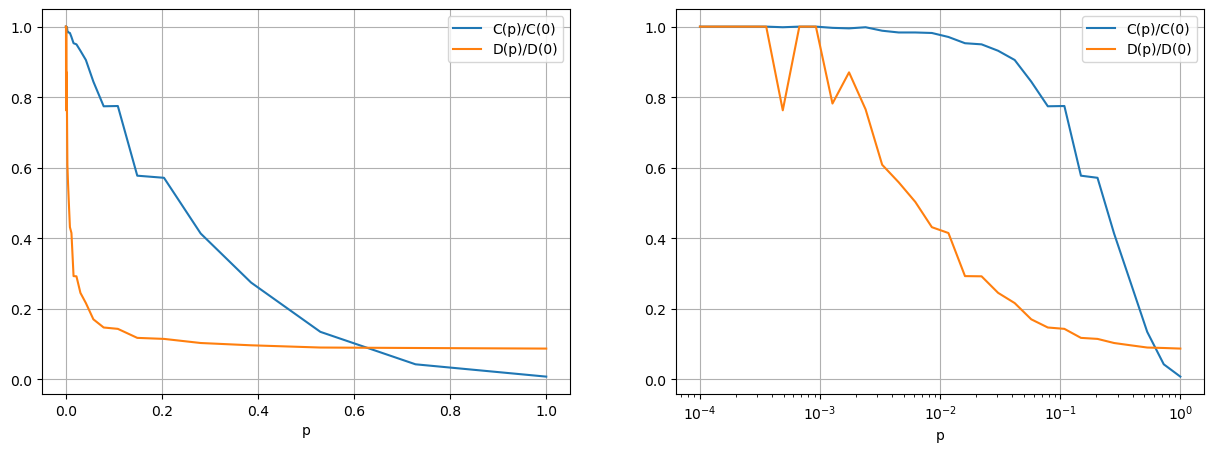

In [341]:
fig, axs = plt.subplots(1,2, figsize=(15,5))
axs[0].plot(probs,CCs)
axs[0].plot(probs,Ls)
axs[0].legend(['C(p)/C(0)', 'D(p)/D(0)'])
axs[0].set_xlabel('p')
axs[0].grid()

axs[1].plot(probs,CCs)
axs[1].plot(probs,Ls)
axs[1].legend(['C(p)/C(0)', 'D(p)/D(0)'])
axs[1].set_xlabel('p')
axs[1].set_xscale('log')
axs[1].grid()

**7.4 [3pt]** Compute the values of the monitored properties of the real citation graph and scale them by the corresponding values of the WS models at $p=0$. Which $p$ whould you select? Explain and generate the model with the chosen parameters. 

*Hint*: Notice the connected components of citation graph for the computaion of the other property. 

In [345]:
# Your solution here ###########################################################
L_cit  = nx.average_shortest_path_length(giant_citation)


print(f'Normalized clustering coefficient of the citation graph: {CC_cit/C0}')
print(f'Normalized average shortest path length of citation graph giant component: {L_cit/L0}')


G_ws = nx.watts_strogatz_graph(n=n, k=k_cit, p=0.2)
CC   = nx.average_clustering(G_ws)
L    = nx.average_shortest_path_length(G_ws)


print(f'Normalized clustering coefficient of G_ws: {CC/C0}')
print(f'Normalized average shortest path length of G_ws: {L/L0}')
#^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

Normalized clustering coefficient of the citation graph: 0.6263679350014839
Normalized average shortest path length of citation graph giant component: 0.06757467641169539
Normalized clustering coefficient of G_ws: 0.594782410571884
Normalized average shortest path length of G_ws: 0.11670978228520411


**Your answer here:**

**7.5 [1pt]** Explain whether the Watts-Strogatz model provides a good fit for the feature graph.

*Hint*: Remember that the feature graph in this section is a pruned version. 

**Your answer here:**

### Question 8 [8pt]: Comparison to Barabási-Albert (BA) model

**8.1 [2pt]** Explain how to determine the preferential attachment parameter for Barabási–Albert graphs. Define $q$ and build the BA graph. 

**Your answer here:**  
number of links in BA = q*n --> q = nb_edges_cit/n

In [112]:
# Your solution here ###########################################################
q = round(G_citation.number_of_edges()/n)
print(q)
#^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
G_ba = nx.barabasi_albert_graph(n, q)

2


Check the number of edges in the Barabási–Albert graph.

In [113]:
print('My Barabási-Albert network that simulates the citation graph has {} edges.'.format(G_ba.size()))

My Barabási-Albert network that simulates the citation graph has 832 edges.


**8.2 [2pt]** Plot the degree distribution histograms for the simulated networks (ER, BA, Configuration, WS).

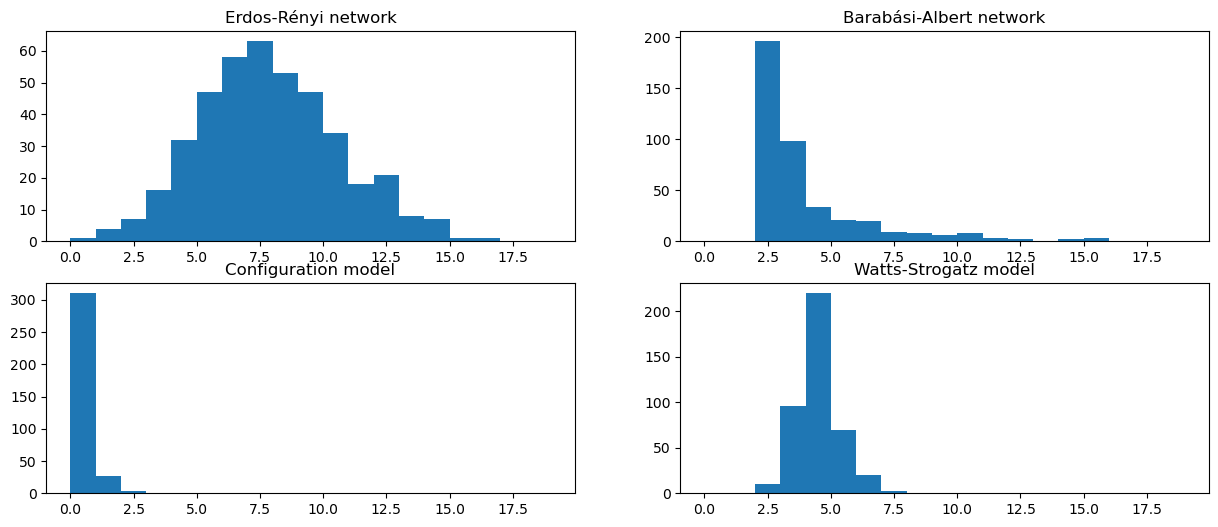

In [114]:
# Your solution here ###########################################################
er_degrees = [x[1] for x in G_er.degree]
ba_degrees = [x[1] for x in G_ba.degree]
config_degrees = [x[1] for x in G_config.degree]
ws_degrees = [x[1] for x in G_ws.degree]
#^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

fig, axes = plt.subplots(2, 2, figsize=(15, 6))

bins = np.arange(20)
axes[0,0].set_title('Erdos-Rényi network')
axes[0,0].hist(er_degrees, bins=bins)
axes[0,1].set_title('Barabási-Albert network')
axes[0,1].hist(ba_degrees, bins=bins)
axes[1,0].set_title('Configuration model')
axes[1,0].hist(config_degrees, bins=bins)
axes[1,1].set_title('Watts-Strogatz model')
axes[1,1].hist(ws_degrees, bins=bins)
plt.show()

**8.3 [2pt]** Explain, in terms of the degree distribution, whether there is a good match between the citation and feature graphs and the simulated networks.
For the citation graph, choose one of the simulated networks above that match its degree distribution best and indicate your preference below.

**Your answer here:**

Now, let us check the average clustering coefficient for the simulated networks.

In [115]:
print("Erdos-Renyi clustering coefficient:", nx.average_clustering(G_er))
print("Barabasi-Albert clustering coefficient:", nx.average_clustering(G_ba))
print("Configuration model clustering coefficient:", nx.average_clustering(nx.Graph(G_config)))
print("Watts-Strogatz model clustering coefficient:", nx.average_clustering(G_ws))

Erdos-Renyi clustering coefficient: 0.015775658419199076
Barabasi-Albert clustering coefficient: 0.04339980748283447
Configuration model clustering coefficient: 0.10958717545517296
Watts-Strogatz model clustering coefficient: 0.2687628161312371


In [116]:
nx.average_clustering(G_citation)

0.31318396750074196

In [117]:
nx.average_clustering(G_feature)

0.17909022944594014

**8.4 [2pt]** Comment on the values you obtain for the simulated networks. Motivate if there is any good match to the citation or feature graph in terms of clustering coefficient.

**Your answer here:**

### Question 9 [13pt]: Network generating process

In this question we will design a network formation model for the directed citation graph, considering it as a growth process.

**9.1 [3pt]** Supposing that authors know all papers in their field at any time, how can we model their choice to cite each of them?

**Your answer here:**  
The copying model is a likely model for a citation network. Indeed researchers are likely to cite papers that are cited in papers they cite.

**9.2 [5pt]** Define a function that takes as input the number of nodes $n$ and any other parameter you identified. This function iteratively grows a graph on $n$ nodes based on the formation model that you described in 9.1. You can add all additional arguments that you need.

In [347]:
# Your solution here ###########################################################
def my_formation_model(n_nodes: int, k_avg: float, p: float, m0: int = 5):
    # initialize adjacency
    A = np.zeros((n_nodes,n_nodes))
    # create a initial random directed graph to grow from.
    A_init = np.random.choice([0,1], (m0,m0))
    np.fill_diagonal(A_init, 0)
    A[:m0,:m0] = A_init

    # time step of growth
    for t in range(m0, n_nodes):
        # looping through existing nodes
        candidates = np.random.choice(range(t),size=round(k_avg), replace=False)
        for candidate in candidates :
            # are we going to connect to candidate or one of its outgoing neighbors?
            node_or_target = bool(np.random.choice([0,1],1, p=[1-p,p]))
            if node_or_target :
                A[t, candidate] = 1
            else :
                # pick one outgoing neighbor of candidate
                outgoing_neighbors = np.argwhere(A[candidate,:]).flatten()
                if len(outgoing_neighbors)== 0:
                    continue
                else:
                    node_to_connect_to = np.random.choice(outgoing_neighbors, size=1)
                A[t, node_to_connect_to] = 1
    
    return A

A_mymodel = my_formation_model(A_citation.shape[0], k_avg=2, p=0.8)
#^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


**9.3 [1pt]** Check wether your graph is directed. If it is, make it undirected.

In [326]:
# Your solution here ###########################################################
if not np.alltrue(A_mymodel==A_mymodel.T):
    A_mymodel = A_mymodel + A_mymodel.T
#^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

**9.4 [2pt]** Compare the degree distributions of the citation graph and yours, then tune the paramters of your model to have a similar distribution.

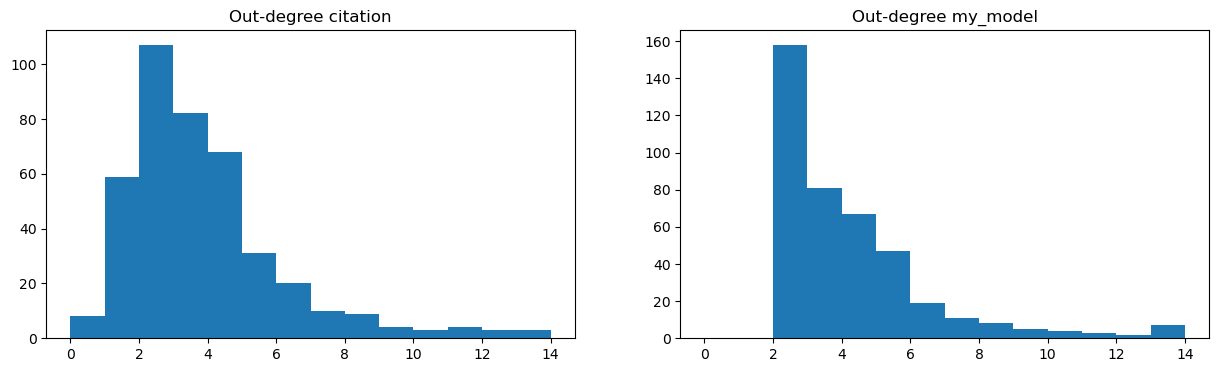

In [327]:
# Your solution here ###########################################################
degrees_citation = np.sum(A_citation, 0)
degrees_mymodel = np.sum(A_mymodel, 0)
#^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

fig, ax = plt.subplots(1, 2, figsize=(15, 4))

ax[0].set(title="Out-degree citation")
ax[0].hist(degrees_citation, bins=np.arange(15))

ax[1].set(title="Out-degree my_model")
ax[1].hist(degrees_mymodel, bins=np.arange(15))

plt.show()

**9.5 [2pt]** Compute and print the following metrics:
- Number of edges
- Giant component size and number of edges
- Clustering coefficient

In [ ]:
# Your solution here ###########################################################
...

#^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


### Question 10 [4pt]: Putting it all together

It is time to identify the best models for our graphs.

**10.1 [4pt]** Compare the metrics computed across all models and discuss which models provide the best fit to our two graphs and which are their shortcomings. Note that the best model could be different for the citation and feture graphs.

**Your answer here:**